In [1]:
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



## Data Processing

(50, 200)

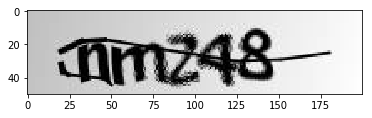

In [2]:
#Load image and convert to grey.
img = io.imread('samples/4dw3w.png',as_grey = True)
#img = io.imread('samples/2en7g.png',as_grey = True)
#img = io.imread('samples/5mnpd.png',as_grey = True)
img = io.imread('samples/nm248.png',as_grey = True)
#img=images[0]
plt.imshow(img, 'gray')
img.shape

## Thresholding

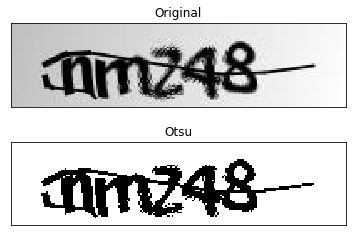

In [3]:
from skimage import filters
from skimage.filters import threshold_otsu
# Otsu thresholding
threshold = threshold_otsu(img)
th3 = img > threshold
#Plot
titles = ['Original', 'Otsu']
images = [img,th3]

for i in range(2):
    plt.subplot(2, 1, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

Then we will try to remove the noise (the line that traverses the image). We will perform Erosions and Dilations (because it is black on white, erosion dilates and dilation erodes). These operation are Morphological Transformations: mathematical operations perfomed on the image's pixels. They will traverse the image with a matrix of nxm (3 by 3 in our case) and multiply the image with it and save the result.

## Dilation

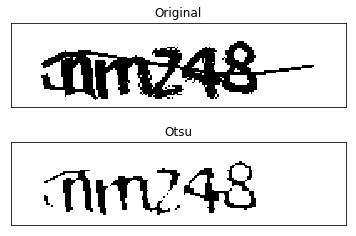

In [4]:
from skimage.morphology import erosion, dilation
kernel = np.ones((3,3), np.uint8)
img_dilation = dilation(th3, kernel)

titles2 = ['Original', 'Otsu']
images2 = [th3,img_dilation]

for i in range(2):
    plt.subplot(2, 1, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
plt.show()


## Erosion

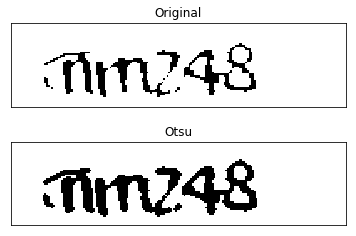

In [5]:
img_erosion = erosion(img_dilation)


titles3 = ['Original', 'Otsu']
images3 = [img_dilation, img_erosion]

for i in range(2):
    plt.subplot(2, 1, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
plt.show()


Now we perform a last Morphological Transformations but this time the kernel is 3x1 to reduce the height of the line.

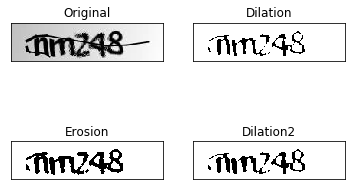

In [6]:
kernel = np.ones((3,1), np.uint8)
img_dilation2 = dilation(img_erosion, kernel)

titles4 = ['Original', 'Dilation', 'Erosion', 'Dilation2']
images4 = [img, img_dilation, img_erosion,img_dilation2]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])


plt.show()


In [7]:
char1=img_dilation2[12:42,30:50]

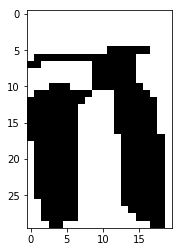

In [8]:
plt.imshow(char1,'gray')

In [9]:
char1[:,1]

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True])

In [10]:
img_dilation3=np.asarray(img_dilation2)

In [11]:
img_dilation3

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [12]:
import cv2
import os

In [13]:
images = []
dir0=('./samples/')
for filename in os.listdir(dir0):
    img = io.imread(os.path.join(dir0,filename),as_grey=True)
    if img is not None:
        images.append(img)
images[0].shape

(50, 200)

In [14]:
filename=[]
filenames=os.listdir(dir0)

In [15]:
for i in filenames:
    filename.append(i[0:5])
filename=np.array(filename)
images=np.array(images)

In [16]:
target=[]
data=[]
images_dil=[]
for img in images:
    threshold = threshold_otsu(img)
    th3 = img > threshold
    kernel = np.ones((3,3), np.uint8)
    img_dilation = dilation(th3, kernel)
    img_erosion = erosion(img_dilation)
    kernel = np.ones((3,1), np.uint8)
    img_dilation2 = dilation(img_erosion, kernel)
    images_dil.append(img_dilation2)
images=np.array(images_dil)

In [17]:
data=[]
target=[]
i=0
for img in images:
    for j in range(5):
        data.append(img[12:42,30+20*j:50+20*j])
        target.append(filename[i][j])
    i=i+1

In [18]:
data=np.array(data)
target=np.array(target)
data=data.reshape(data.shape[0],data.shape[1]*data.shape[2])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,stratify=target,random_state=0)

## logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
from sklearn.metrics import classification_report
print("Classification report for validation dataset\n",classification_report(y_test, y_fit))

C:\Users\om mishra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\om mishra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification report for validation dataset
               precision    recall  f1-score   support

           2       0.90      0.82      0.86        68
           3       0.73      0.87      0.79        67
           4       0.94      0.88      0.91        72
           5       0.82      0.76      0.79        72
           6       0.68      0.70      0.69        67
           7       0.84      0.89      0.87        65
           8       0.73      0.68      0.70        68
           b       0.80      0.84      0.82        61
           c       0.74      0.72      0.73        69
           d       0.85      0.68      0.76        66
           e       0.86      0.84      0.85        61
           f       0.84      0.81      0.82        69
           g       0.70      0.77      0.73        70
           m       0.41      0.44      0.43        70
           n       0.57      0.66      0.61       134
           p       0.67      0.58      0.62        65
           w       0.75      0.66  

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
print("Classification report for validation dataset\n",classification_report(y_test, y_fit))

C:\Users\om mishra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\om mishra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification report for validation dataset
               precision    recall  f1-score   support

           2       0.90      0.82      0.86        68
           3       0.73      0.87      0.79        67
           4       0.94      0.88      0.91        72
           5       0.82      0.76      0.79        72
           6       0.68      0.70      0.69        67
           7       0.84      0.89      0.87        65
           8       0.73      0.68      0.70        68
           b       0.80      0.84      0.82        61
           c       0.74      0.72      0.73        69
           d       0.85      0.68      0.76        66
           e       0.86      0.84      0.85        61
           f       0.84      0.81      0.82        69
           g       0.70      0.77      0.73        70
           m       0.41      0.44      0.43        70
           n       0.57      0.66      0.61       134
           p       0.67      0.58      0.62        65
           w       0.75      0.66  

## SVM

In [22]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
print("Classification report for validation dataset\n",classification_report(y_test, y_fit))

C:\Users\om mishra\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classification report for validation dataset
               precision    recall  f1-score   support

           2       0.98      0.84      0.90        68
           3       0.88      0.85      0.86        67
           4       0.83      0.90      0.87        72
           5       0.81      0.85      0.83        72
           6       0.85      0.84      0.84        67
           7       0.85      0.88      0.86        65
           8       0.83      0.84      0.83        68
           b       0.81      0.90      0.85        61
           c       0.70      0.83      0.76        69
           d       0.90      0.53      0.67        66
           e       0.94      0.77      0.85        61
           f       0.83      0.78      0.81        69
           g       0.78      0.73      0.76        70
           m       0.74      0.33      0.46        70
           n       0.58      0.89      0.70       134
           p       0.88      0.71      0.79        65
           w       0.73      0.75  

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=0)
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
print("Classification report for validation dataset\n",classification_report(y_test, y_fit))

Classification report for validation dataset
               precision    recall  f1-score   support

           2       0.98      0.90      0.94        68
           3       0.88      0.97      0.92        67
           4       1.00      0.90      0.95        72
           5       0.89      0.92      0.90        72
           6       0.88      0.88      0.88        67
           7       0.89      0.91      0.90        65
           8       0.94      0.94      0.94        68
           b       0.88      0.97      0.92        61
           c       0.79      0.87      0.83        69
           d       0.82      0.77      0.80        66
           e       0.82      0.89      0.85        61
           f       0.86      0.93      0.90        69
           g       0.90      0.80      0.85        70
           m       0.77      0.66      0.71        70
           n       0.73      0.85      0.78       134
           p       0.88      0.80      0.84        65
           w       0.94      0.79  

## Random forest is the best classifier as it yields the best F1 score

In [45]:
import sklearn
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100,200,400,500,600],
              'min_samples_leaf': [2,3,4,5,6]}
grid = GridSearchCV(model, param_grid,n_jobs=-1)
%time grid.fit(X_train, y_train)
print(grid.best_params_)
model = grid.best_estimator_

C:\Users\om mishra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 3min 21s
{'min_samples_leaf': 2, 'n_estimators': 200}


In [22]:
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
print("Classification report for validation dataset\n",classification_report(y_test, y_fit))

Classification report for validation dataset
               precision    recall  f1-score   support

           2       0.98      0.90      0.94        68
           3       0.88      0.97      0.92        67
           4       1.00      0.90      0.95        72
           5       0.89      0.92      0.90        72
           6       0.88      0.88      0.88        67
           7       0.89      0.91      0.90        65
           8       0.94      0.94      0.94        68
           b       0.88      0.97      0.92        61
           c       0.79      0.87      0.83        69
           d       0.82      0.77      0.80        66
           e       0.82      0.89      0.85        61
           f       0.86      0.93      0.90        69
           g       0.90      0.80      0.85        70
           m       0.77      0.66      0.71        70
           n       0.73      0.85      0.78       134
           p       0.88      0.80      0.84        65
           w       0.94      0.79  

## Confusion Matrix

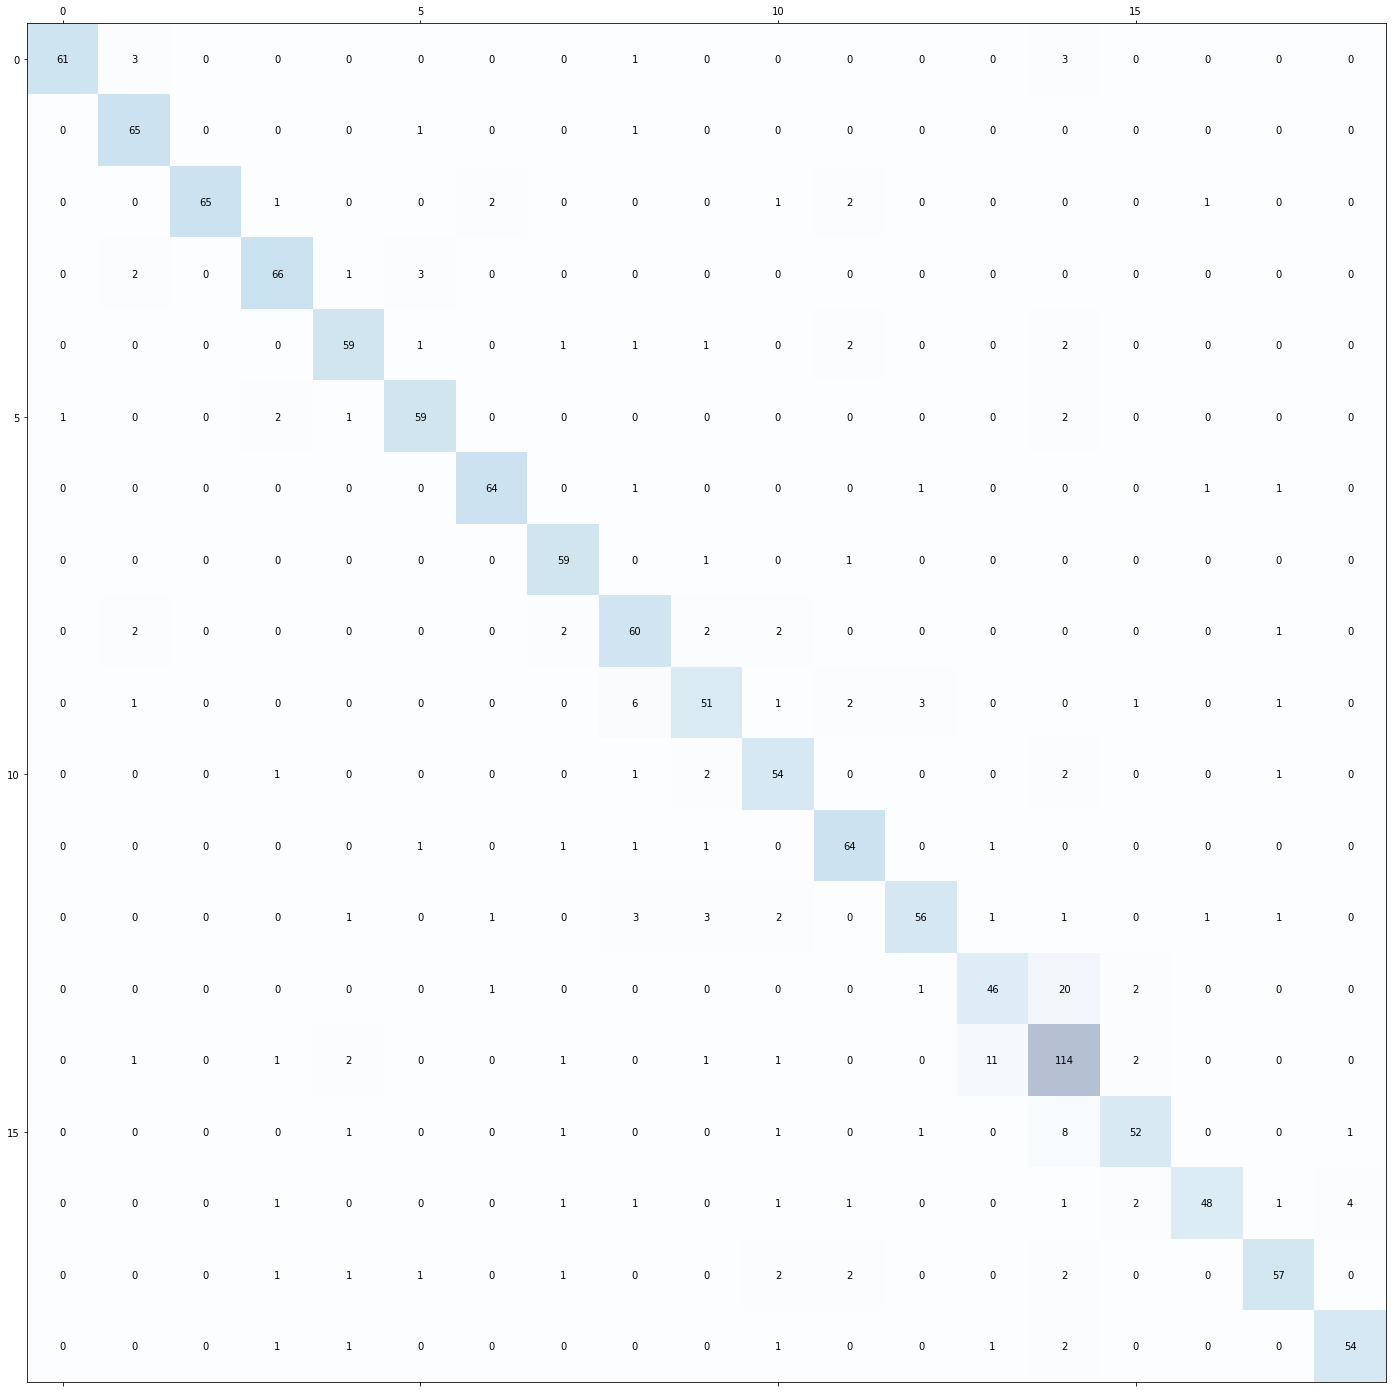

In [23]:
from sklearn.metrics import confusion_matrix 
confmat = confusion_matrix(y_true=y_test, y_pred=y_fit) 
fig, ax = plt.subplots(figsize=(25, 25)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) 

for i in range(confmat.shape[0]): 
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
        

In [24]:
confmat.shape[1]

19

### We can see that accuracy for 'm' and 'n' is low. The reson is that 'm' has width more than 20 and since we are using fixed width cutting it is unable to capture whole 'm' and is hence predicting it wrong to 'n'. 

## Test data processing

In [25]:
images_test = []
dir0=('./test_samples/')
for filename in os.listdir(dir0):
    img = io.imread(os.path.join(dir0,filename),as_grey=True)
    if img is not None:
        images_test.append(img)
images_test[0].shape

(50, 200)

In [26]:
filename=[]
filenames=os.listdir(dir0)
for i in filenames:
    filename.append(i[0:5])
filename=np.array(filename)
images_test=np.array(images_test)

In [27]:
target=[]
data=[]
images_dil=[]
for img in images_test:
    threshold = threshold_otsu(img)
    th3 = img > threshold
    kernel = np.ones((3,3), np.uint8)
    img_dilation = dilation(th3, kernel)
    img_erosion = erosion(img_dilation)
    kernel = np.ones((3,1), np.uint8)
    img_dilation2 = dilation(img_erosion, kernel)
    images_dil.append(img_dilation2)
images=np.array(images_dil)

In [28]:
len(target)

0

In [29]:
data=[]
target=[]
i=0
for img in images:
    for j in range(5):
        data.append(img[12:42,30+20*j:50+20*j])
        target.append(filename[i][j])
    i=i+1

In [30]:
data=np.array(data)
target=np.array(target)
data=data.reshape(data.shape[0],data.shape[1]*data.shape[2])

In [31]:
y_fit=model.predict(data)
y_fit=np.array(y_fit)

In [32]:
captcha=[]
string=""
t=y_fit.shape[0]
for i in range(int(t)):
    string=string+y_fit[i]
    if((i+1)%5==0):
        captcha.append(string)
        string=""
    
    

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ",accuracy_score(filename,captcha))

Accuracy score:  0.8333333333333334


In [34]:
filename

array(['2b827', '2bg48', '2cegf', '3ndxd', '3nfdn', '5fyem'], dtype='<U5')

In [35]:
captcha


['2b827', '2bg48', '2cegf', '3ndxd', '3nffn', '5fyem']

### While predicting the whole captcha we can clearly see that where letter 'm' and 'n' are occuring the accuracy is low. But all others the accuracy is pretty good.

### Yes we can improve the accuracy if we use sliding window rather than a fixed window as we are using at present. If we use a sliding window we can capture exact width of each letter. The problem with 'm' and 'n' will also be mitigated if we use variable window

### Finding the point at which we will split the window will be difficult because the words are joined together and are not seperated. Since width will be different for all the letters we will have to make each letter to common width by filling empty spaces at other places.